## Q1


In [28]:
import numpy as np

k_B = 1.380*10**-23
T= 300
eta = 10**-3
R=10**-6
k_x = 10**-6
k_y = 9*10**-6

gamma = 6*np.pi*eta*R

D = (k_B*T)/gamma

##Q1
tau_trap_x = gamma/k_x
tau_trap_y = gamma/k_y

print("tau_trap_x:", tau_trap_x,"\ntau_trap_y:", tau_trap_y)




tau_trap_x: 0.01884955592153876 
tau_trap_y: 0.0020943951023931952


Choose dt much smaller than the smallest $\tau$, e.g 2 times smaller.

In [ ]:
min_tau = np.min((tau_trap_x,tau_trap_y))
dt = min_tau/10
print("dt=",dt)

dt= 0.0002


## P1

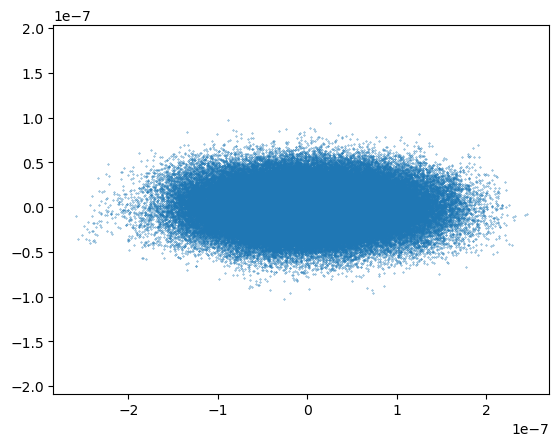

In [30]:
import matplotlib.pyplot as plt
t_tot = 30
N= int(t_tot/dt)

x = np.zeros(N)    
y = np.zeros(N)    
w_x=np.random.normal(0,1,N)  # Gaussian distributed random numbers 
w_y=np.random.normal(0,1,N)  # Gaussian distributed random numbers 
for i in range(N-1):
    x[i+1] = x[i] - k_x*x[i]*dt/gamma + np.sqrt(2*k_B*T*dt/gamma)*w_x[i]     
    y[i+1] = y[i] - k_y*y[i]*dt/gamma + np.sqrt(2*k_B*T*dt/gamma)*w_y[i]      


### P1
##scale to nm
plt.plot(x,y,'.',markersize=0.6)
plt.axis('equal')
plt.show()

## P2


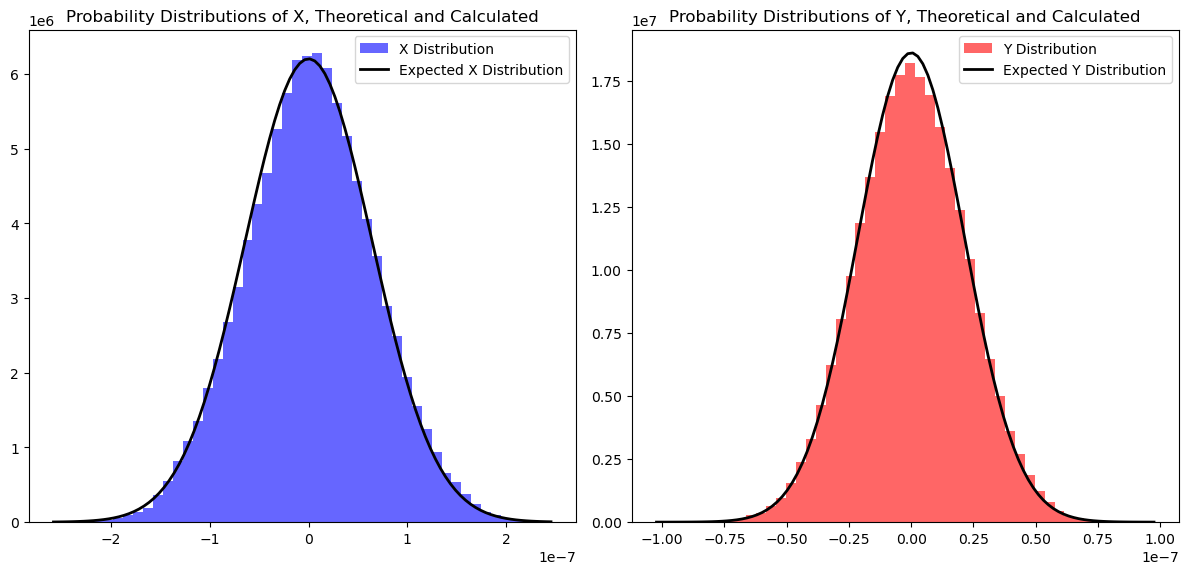

In [31]:
#### P2
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for X distribution and theoretical distribution
axes[0].hist(x, bins=50, density=True, alpha=0.6, color='blue', label='X Distribution')
x_generated = np.linspace(np.min(x), np.max(x), 100)
U_x = 0.5 * k_x * x_generated**2
p_x = np.exp(-U_x / (k_B * T))
p_x /= np.sum(p_x) * (x_generated[1] - x_generated[0])  # Normalize
axes[0].plot(x_generated, p_x, color='black', label='Expected X Distribution', linewidth=2)
axes[0].set_title('Probability Distributions of X, Theoretical and Calculated')
axes[0].legend()

# Plot for Y distribution and theoretical distribution
axes[1].hist(y, bins=50, density=True, alpha=0.6, color='red', label='Y Distribution')
y_generated = np.linspace(np.min(y), np.max(y), 100)
U_y = 0.5 * k_y * y_generated**2
p_y = np.exp(-U_y / (k_B * T))
p_y /= np.sum(p_y) * (y_generated[1] - y_generated[0])  # Normalize
axes[1].plot(y_generated, p_y, color='black', label='Expected Y Distribution', linewidth=2)
axes[1].set_title('Probability Distributions of Y, Theoretical and Calculated')
axes[1].legend()

plt.tight_layout()
plt.show()

## Q2

In [32]:
sigma_x = np.var(x)
sigma_y = np.var(y)

harmonic_trap_x = k_B*T/k_x
harmonic_trap_y = k_B*T/k_y

print("sigma_x:",sigma_x, "vs Harmonic_trap_x:", harmonic_trap_x)
print("sigma_y:",sigma_y, "vs Harmonic_trap_y:", harmonic_trap_y)

sigma_x: 4.225492948353702e-15 vs Harmonic_trap_x: 4.1399999999999994e-15
sigma_y: 4.826309653107175e-16 vs Harmonic_trap_y: 4.599999999999999e-16


y has higher stiffness and therefore wont move as much as x, thus the variance is smaller.

## P3

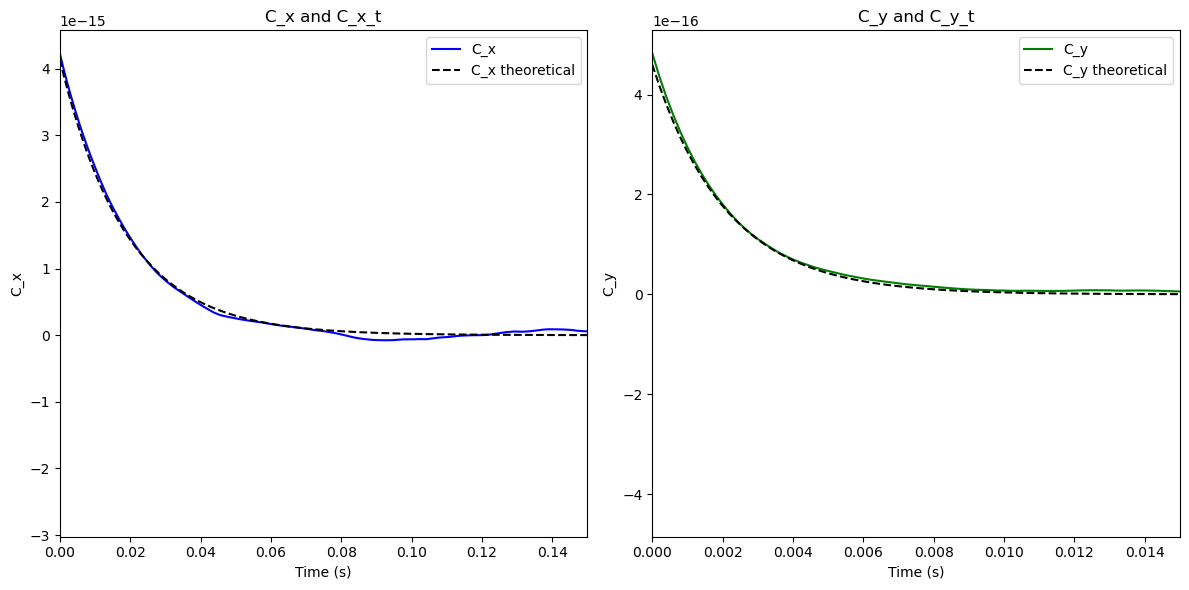

In [34]:

# TODO ask how this compares to tMSD nad how i could change this
C_x = np.zeros(N)
for n in range(N):
    frac = 1/(N-n)
    C_x[n] = frac* np.sum(x[n:]*x[:N-n])

C_y = np.zeros(N)
for n in range(0,N):
    frac = 1/(N-n)
    C_y[n] = frac* np.sum(y[n:]*y[:N-n])


t = np.arange(0,N)*dt
C_x_t = (k_B * T / k_x) * np.exp(-k_x * t / gamma)
C_y_t = (k_B * T / k_y) * np.exp(-k_y * t / gamma)


# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot C_x and C_x_t on the first subplot
axes[0].plot(t, C_x, color="blue", label="C_x")
axes[0].plot(t, C_x_t, "k--", label="C_x theoretical")  # Black dashed line for C_x_t
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("C_x")
axes[0].legend()
axes[0].set_title("C_x and C_x_t")
axes[0].set_xlim([0, 0.15])

# Plot C_y and C_y_t on the second subplot
axes[1].plot(t, C_y, color="green", label="C_y")
axes[1].plot(t, C_y_t, "k--", label="C_y theoretical")  # Black dashed line for C_y_t
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("C_y")
axes[1].legend()
axes[1].set_title("C_y and C_y_t")
axes[1].set_xlim([0, 0.015])

# Show the plot
plt.tight_layout()
plt.show()

